Problem 1a

$p_{2}(x) = \frac{(x - x_{1})(x - x_{2})}{(x_{0} - x_{1})(x_{0} - x_{2})}f_{0} + \frac{(x - x_{0})(x - x_{2})}{(x_{1} - x_{0})(x_{1} - x_{2})}f_{1} + \frac{(x - x_{0})(x - x_{1})}{(x_{2} - x_{0})(x_{2} - x_{1})}f_{2}$
$= \frac{(x - 1)(x - 3)}{(0 - 1)(0 - 3)}1 + \frac{(x - 0)(x - 3)}{(1 - 0)(1 - 3)}1 - 5\frac{(x - 0)(x - 1)}{(3 - 0)(3 - 1)}$
$= \frac{(x - 1)(x - 3)}{3} - \frac{x(x - 3)}{2} - 5\frac{x(x - 1)}{6}$

Problem 1b

$p_{2}(2) = \frac{(2 - 1)(2 - 3)}{3} - \frac{2(2 - 3)}{2} - 5\frac{2(2 - 1)}{6} = -1$

In [385]:
# This is implementation of the Lebesgue function for problem 2a written by Jennie Wu
# Last Modified: Oct 22, 2021
# Input: x-value, nodes, degree n and j
# Expected Output: Lebesgue function associated to a given set of pairwise distinct nodes 

# Definition for elementary Lagrange polynomials of degree n
def lj(x, nodes, n, j):
    prod = 1
    for k in range(n + 1):
        if k != j:
            prod *= (x - nodes[k]) / (nodes[j] - nodes[k])
    return prod

# Definition for the Lebesgue function
def Ln(x, nodes, n):
    sum = 0
    for j in range(n + 1):
        sum += abs(lj(x, nodes, n, j))
    return sum


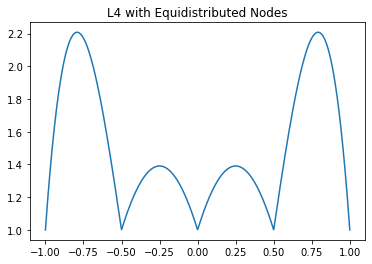

The Lebesgue Constant of L4 with equidistributed nodes is 2.2078240105629434


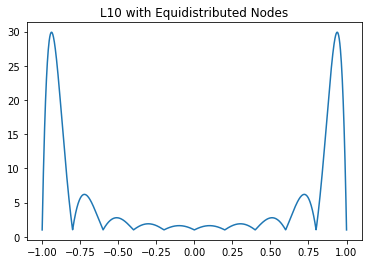

The Lebesgue Constant of L10 with equidistributed nodes is 29.897758816015603


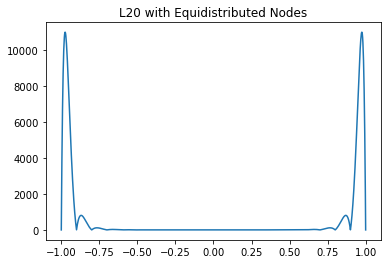

The Lebesgue Constant of L20 with equidistributed nodes is 10978.795044663122


In [386]:
# Problem 2b
# Last Modified: Oct 22, 2021
# Input: degree n, equidistributed nodes, x-values in [-1, 1], y-values
# Expected Output: plots for Ln with equidistributed nodes

import matplotlib.pyplot as plt
import numpy as np
import math

# Function for equidistributed nodes
def xj(n):
    xj = []
    for j in range(n + 1):
        xj.append(-1 + j * (2 / n))
    return xj

# create x-values in the interval [-1, 1]
x = np.linspace(-1, 1, 1000)
# calculate for y-values from each x-value in [-1, 1]
ye1 = [Ln(i, xj(4), 4) for i in x]
ye2 = [Ln(i, xj(10), 10) for i in x]
ye3 = [Ln(i, xj(20), 20) for i in x]

# plot the graphs according to x and y values calculated above
plt.plot(x, ye1) 
plt.title("L4 with Equidistributed Nodes")
plt.show()
print("The Lebesgue Constant of L4 with equidistributed nodes is", max(Ln(x, xj(4), 4)))

plt.plot(x, ye2) 
plt.title("L10 with Equidistributed Nodes")
plt.show()
print("The Lebesgue Constant of L10 with equidistributed nodes is", max(Ln(x, xj(10), 10)))

plt.plot(x, ye3)
plt.title("L20 with Equidistributed Nodes")
plt.show()
print("The Lebesgue Constant of L20 with equidistributed nodes is", max(Ln(x, xj(20), 20)))

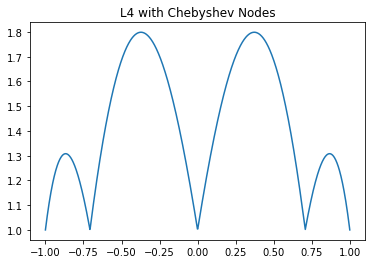

The Lebesgue Constant of L4 with Chebyshev nodes is 1.7987562863169286


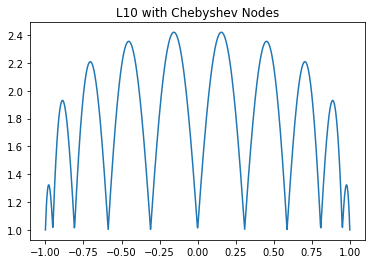

The Lebesgue Constant of L10 with Chebyshev nodes is 2.4209123719623764


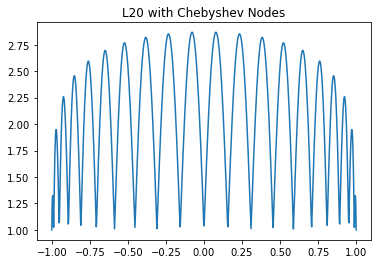

The Lebesgue Constant of L20 with Chebyshev nodes is 2.867656286328131

2c) For both equidistributed points and Chebyshev nodes, the more nodes we choose, the higher Lebesgue Constant is. Also, for the equidistributed points, the error centered at the end, while that of the Chebyshev nodes is more centered in the middle.


In [387]:
# Problem 2c 
# Last Modified: Oct 22, 2021
# Input: degree n, x-values in [-1, 1], y-values, and Chebyshev Nodes
# Expected Output: plots for Ln with Chebyshev nodes

# function for Chebyshev nodes
def xChebyshev(n):
    return [math.cos(j * math.pi / n) for j in range(0,n + 1)] 

# y-values using Chebyshev nodes
yc1 = [Ln(i, xChebyshev(4), 4) for i in x]
yc2 = [Ln(i, xChebyshev(10), 10) for i in x]
yc3 = [Ln(i, xChebyshev(20), 20) for i in x]

# plot Ln with Chebyshev nodes
plt.plot(x, yc1)
plt.title("L4 with Chebyshev Nodes")
plt.show()
print("The Lebesgue Constant of L4 with Chebyshev nodes is", max(Ln(x, xChebyshev(4), 4)))

plt.plot(x, yc2) 
plt.title("L10 with Chebyshev Nodes")
plt.show()
print("The Lebesgue Constant of L10 with Chebyshev nodes is", max(Ln(x, xChebyshev(10), 10)))

plt.plot(x, yc3) 
plt.title("L20 with Chebyshev Nodes")
plt.show()
print("The Lebesgue Constant of L20 with Chebyshev nodes is", max(Ln(x, xChebyshev(20), 20)))

# Comment
print()
print("2c) For both equidistributed points and Chebyshev nodes, the more nodes we choose, the higher Lebesgue Constant is. Also, for the equidistributed points, the error centered at the end, while that of the Chebyshev nodes is more centered in the middle.")

In [388]:
# This is implementation of the Barycentric Formula for problem 3a written by Jennie Wu
# Last Modified: Oct 22, 2021
# Input: x-values, nodes, degree n, list of functions, and barycentric weights
# Expected Output: Barycentric Formula

# function for barycentric weights
def lambdaj(nodes, n):
    lam = np.ones(n + 1)
    for j in range(n+1):
        for k in range(n+1):
            if k != j:
                lam[j] *= 1 / (nodes[j] - nodes[k])
    return lam

# function for barycentric formula
def barycentric(x, nodes, n, functions, lambdab):
    sumupper = [lambdab[j] * functions[j] / (x - nodes[j]) for j in range(n + 1) if x != nodes[j]]
    sumlower = [lambdab[j] / (x - nodes[j]) for j in range(n + 1) if x != nodes[j]]
    return sum(sumupper) / sum(sumlower)
    

p_5(2) = -2.3438296081729173


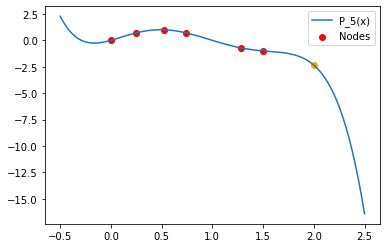

In [389]:
# Problem 3b written by Jennie Wu
# Last Modified: Oct 22, 2021
# Input: list of x-values and y-valus
# Expected Output: P5(2) as an approximation of f(2)

x_j = [0.00, 0.25, 0.52, 0.74, 1.28, 1.50]
f_j = [0.0000, 0.7070, 1.0000, 0.7071, -0.7074, -1.0000]

print("p_5(2) =", barycentric(2, x_j, 5, f_j, lambdaj(x_j, 5)))

t = np.linspace(-0.5,2.5,100)

plt.scatter(x_j,f_j,color='r', label='Nodes')
plt.scatter(2,barycentric_old(2,x_j,5,f_j,lambdaj(x_j,5)), color = 'orange')
plt.plot(t, [barycentric_old(pt, x_j, 5, f_j, lambdaj(x_j,5)) for pt in t], label = 'P_5(x)')
plt.legend()
plt.show()

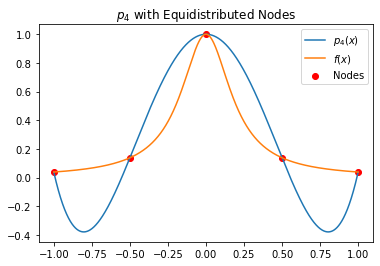

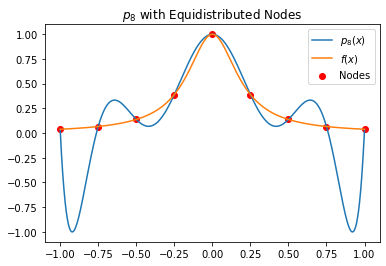

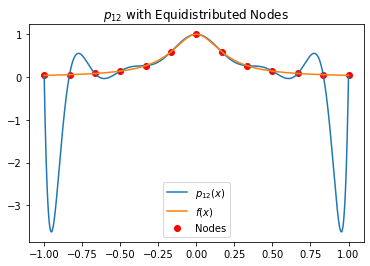

In [390]:
# This is implementation of the Runge Example for problem 4a written by Jennie Wu
# Last Modified: Oct 22, 2021
# Input: x-values, y-values using equidistributed nodes, degree n, and the equidistributed nodes
# Expected Output: graphs of pn with equidistributed nodes

# function definition that returns a value
def f(x):
    return (1 / (1 + 25 * x ** 2))

# function definition that returns a list of y-values to be used in barycentric formula
def fb(x, n):
    fx = []
    for i in range(n + 1):
        fx.append(1 / (1 + 25 * x[i] ** 2))
    return fx

# function for equidistributed nodes
def xj(n):
    xj = []
    for j in range(n + 1):
        xj.append(-1 + j * (2 / n))
    return xj

# barycentric weights for equidistributed nodes
def lambda1(n):
    lam = []
    for j in range(n + 1):
        lam.append((-1) ** j * math.factorial(n) / (math.factorial(n - j) * math.factorial(j)))
    return lam

# barycentric weights for Chebyshev nodes
def lambda2(n):
    lam = []
    for j in range(n + 1):
        if j == 0 or j == n:
            lam.append(1 / 2 * (-1) ** j)
        else:
            lam.append((-1) ** j)
    return lam

# x-values in [-1, 1], note that since the function is not defined at the endpoints -1 and 1, we adjust the interval to [-1.000001, 1.000001]
x = np.linspace(-1.000001, 1.000001, 3000)
# y-values generated by x-values using equidistrubuted nodes
y1_e = [barycentric(i, xj(4), 4, fb(xj(4), 4), lambda1(4)) for i in x]
y2_e = [barycentric(i, xj(8), 8, fb(xj(8), 8), lambda1(8)) for i in x]
y3_e = [barycentric(i, xj(12), 12, fb(xj(12), 12), lambda1(12)) for i in x]

# plots for pn with equidistributed nodes
plt.plot(x, y1_e, label = '$p_{4}(x)$')
plt.plot(x, f(x), label = '$f(x)$')
plt.scatter(xj(4), fb(xj(4), 4), color = 'r', label = 'Nodes')
plt.title("$p_{4}$ with Equidistributed Nodes")
plt.legend()
plt.show()

plt.plot(x, y2_e, label = '$p_{8}(x)$')
plt.plot(x, f(x), label = '$f(x)$')
plt.scatter(xj(8), fb(xj(8), 8), color = 'r', label = 'Nodes')
plt.title("$p_{8}$ with Equidistributed Nodes")
plt.legend()
plt.show()

plt.plot(x, y3_e, label = '$p_{12}(x)$')
plt.plot(x, f(x), label = '$f(x)$')
plt.scatter(xj(12), fb(xj(12), 12), color = 'r', label = 'Nodes')
plt.title("$p_{12}$ with Equidistributed Nodes")
plt.legend()
plt.show()



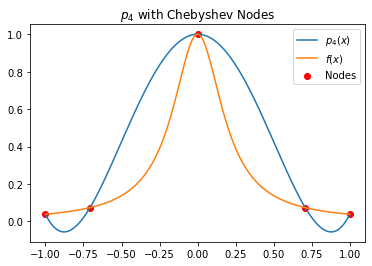

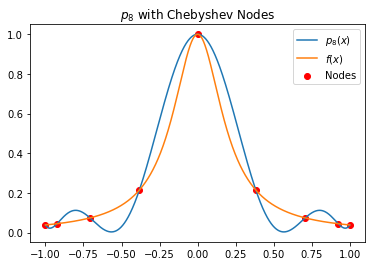

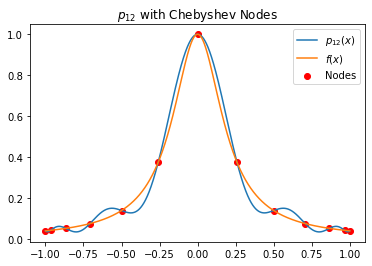

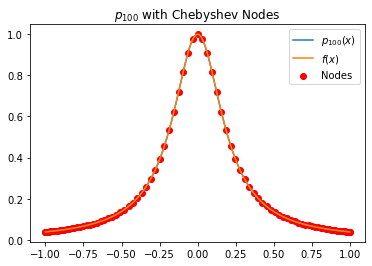

In [391]:
# This is implementation of the Runge Example for problem 4b written by Jennie Wu
# Last Modified: Oct 22, 2021
# Input: x-values, y-values using Chebyshev nodes, degree n, and the equidistributed nodes
# Expected Output: graphs of pn with Chebyshev nodes

# y-values generated by x-values using Chebyshev nodes
y1_c = [barycentric(i, xChebyshev(4), 4, fb(xChebyshev(4), 4), lambda2(4)) for i in x]
y2_c = [barycentric(i, xChebyshev(8), 8, fb(xChebyshev(8), 8), lambda2(8)) for i in x]
y3_c = [barycentric(i, xChebyshev(12), 12, fb(xChebyshev(12), 12), lambda2(12)) for i in x]
y4_c = [barycentric(i, xChebyshev(100), 100, fb(xChebyshev(100), 100), lambda2(100)) for i in x]

# plots for pn with Chebyshev nodes
plt.plot(x, y1_c, label = '$p_{4}(x)$')
plt.plot(x, f(x), label = '$f(x)$')
plt.scatter(xChebyshev(4), fb(xChebyshev(4), 4), color = 'r', label = 'Nodes')
plt.title("$p_{4}$ with Chebyshev Nodes")
plt.legend()
plt.show()

plt.plot(x, y2_c, label = '$p_{8}(x)$')
plt.plot(x, f(x), label = '$f(x)$')
plt.scatter(xChebyshev(8), fb(xChebyshev(8), 8), color = 'r', label = 'Nodes')
plt.title("$p_{8}$ with Chebyshev Nodes")
plt.legend()
plt.show()

plt.plot(x, y3_c, label = '$p_{12}(x)$')
plt.plot(x, f(x), label = '$f(x)$')
plt.scatter(xChebyshev(12), fb(xChebyshev(12), 12), color = 'r', label = 'Nodes')
plt.title("$p_{12}$ with Chebyshev Nodes")
plt.legend()
plt.show()

plt.plot(x, y4_c, label = '$p_{100}(x)$')
plt.plot(x, f(x), label = '$f(x)$')
plt.scatter(xChebyshev(100), fb(xChebyshev(100), 100), color = 'r', label = 'Nodes')
plt.title("$p_{100}$ with Chebyshev Nodes")
plt.legend()
plt.show()

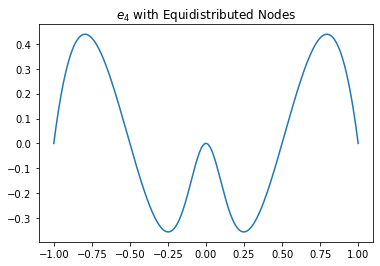

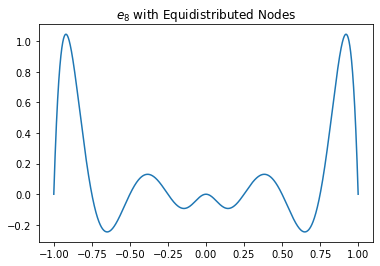

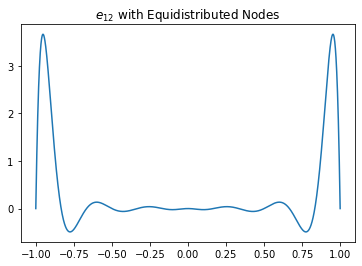

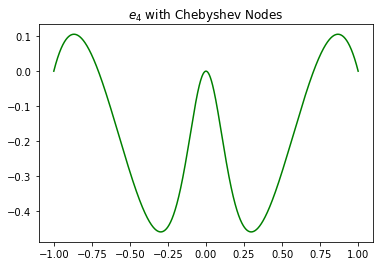

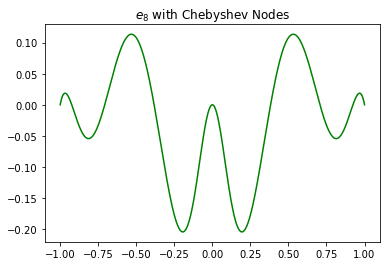

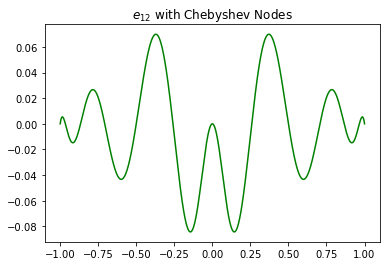

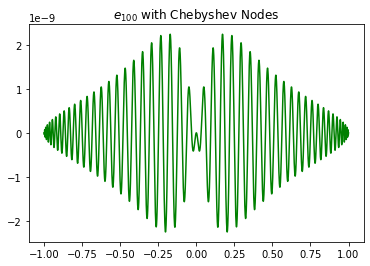

In [392]:
# Problem 4c written by Jennie Wu
# Last Modified: Oct 22, 2021
# Input: degree n, Chebyshev nodes, and equidistributed nodes
# Expected Output: graphs of en with Chebyshev nodes and equidistributed nodes

# error function with equidistributed nodes
def errorE(n):
    return [f(i) - barycentric(i, xj(n), n, fb(xj(n), n), lambda1(n)) for i in x]

# error function with Chebyshev nodes
def errorC(n):
    return [f(i) - barycentric(i, xChebyshev(n), n, fb(xChebyshev(n), n), lambda2(n)) for i in x] 

# plots for error functions
plt.plot(x, errorE(4))
plt.title("$e_{4}$ with Equidistributed Nodes")
plt.show()

plt.plot(x, errorE(8))
plt.title("$e_{8}$ with Equidistributed Nodes")
plt.show()

plt.plot(x, errorE(12))
plt.title("$e_{12}$ with Equidistributed Nodes")
plt.show()

plt.plot(x, errorC(4), color = 'g')
plt.title("$e_{4}$ with Chebyshev Nodes")
plt.show()

plt.plot(x, errorC(8), color = 'g')
plt.title("$e_{8}$ with Chebyshev Nodes")
plt.show()

plt.plot(x, errorC(12), color = 'g')
plt.title("$e_{12}$ with Chebyshev Nodes")
plt.show()

plt.plot(x, errorC(100), color = 'g')
plt.title("$e_{100}$ with Chebyshev Nodes")
plt.show()


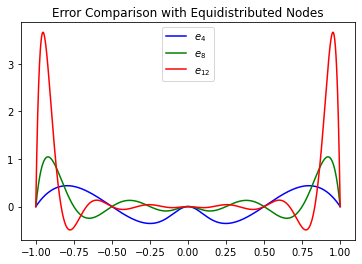

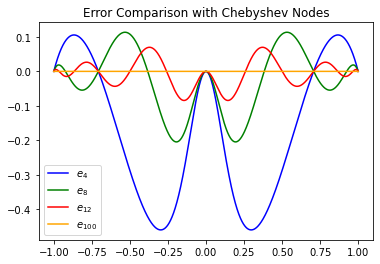


The error for equidistributed and Chebyshev nodes differ in behavior as shown by the graphs. While the error for equidistributed nodes clustered at the end of the interval, that of the Chebyshev nodes centered in the middle. In addition, as n increases, the fluctuation of error with equidistributed nodes at the end of the interval increases, while that of Chebyshev nodes decreases around the middle. This means that whether pn converges to the function really depends on the distribution of nodes.


In [393]:
# Error comparison for a clear view

plt.plot(x, errorE(4), color = 'b', label = "$e_{4}$")
plt.plot(x, errorE(8), color = 'g', label = "$e_{8}$")
plt.plot(x, errorE(12), color = 'r', label = "$e_{12}$")
plt.title("Error Comparison with Equidistributed Nodes")
plt.legend()
plt.show()

plt.plot(x, errorC(4), color = 'b', label = "$e_{4}$")
plt.plot(x, errorC(8), color = 'g', label = "$e_{8}$")
plt.plot(x, errorC(12), color = 'r', label = "$e_{12}$")
plt.plot(x, errorC(100), color = 'orange', label = "$e_{100}$")
plt.title("Error Comparison with Chebyshev Nodes")
plt.legend()
plt.show()

print()
print("The error for equidistributed and Chebyshev nodes differ in behavior as shown by the graphs. While the error for equidistributed nodes clustered at the end of the interval, that of the Chebyshev nodes centered in the middle. In addition, as n increases, the fluctuation of error with equidistributed nodes at the end of the interval increases, while that of Chebyshev nodes decreases around the middle. This means that whether pn converges to the function really depends on the distribution of nodes.")


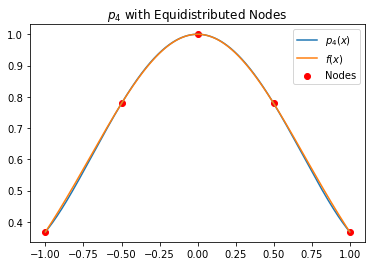

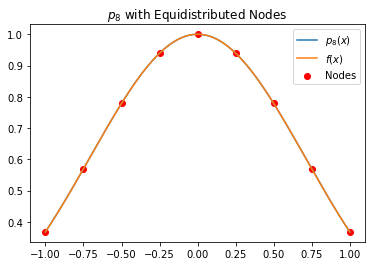

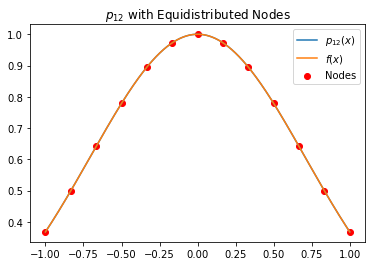

In [394]:
# # This is implementation of the Runge Example for problem 4b written by Jennie Wu
# Last Modified: Oct 22, 2021
# Input: x-values, degree n, equidistributed nodes, new function definition
# Expected Output: graphs of pn with equidistributed nodes

# new function definition that returns a list of y-values to be used in barycentric formula
def fNew(x, n):
    fx = []
    for i in range(n + 1):
        fx.append(math.e ** (-x[i] ** 2))
    return fx

# new function definition that returns a value
def fNewe(x):
    return math.e ** (-x ** 2)

# y-values generated by equidistributed nodes
y1_e = [barycentric(i, xj(4), 4, fNew(xj(4), 4), lambda1(4)) for i in x]
y2_e = [barycentric(i, xj(8), 8, fNew(xj(8), 8), lambda1(8)) for i in x]
y3_e = [barycentric(i, xj(12), 12, fNew(xj(12), 12), lambda1(12)) for i in x]

# plots for the new function and pn
plt.plot(x, y1_e, label = '$p_{4}(x)$')
plt.plot(x, fNewe(x), label = '$f(x)$')
plt.scatter(xj(4), fNew(xj(4), 4), color = 'r', label = 'Nodes')
plt.title("$p_{4}$ with Equidistributed Nodes")
plt.legend()
plt.show()

plt.plot(x, y2_e, label = '$p_{8}(x)$')
plt.plot(x, fNewe(x), label = '$f(x)$')
plt.scatter(xj(8), fNew(xj(8), 8), color = 'r', label = 'Nodes')
plt.title("$p_{8}$ with Equidistributed Nodes")
plt.legend()
plt.show()

plt.plot(x, y3_e, label = '$p_{12}(x)$')
plt.plot(x, fNewe(x), label = '$f(x)$')
plt.scatter(xj(12), fNew(xj(12), 12), color = 'r', label = 'Nodes')
plt.title("$p_{12}$ with Equidistributed Nodes")
plt.legend()
plt.show()


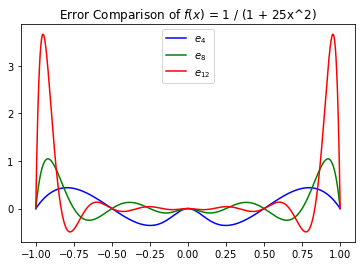

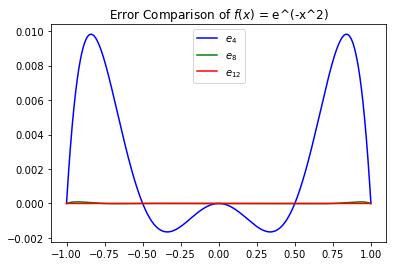

As shown by the graph of error comparison for two functions, we can see error behaves differently as well. As n increases, the error for f(x) = 1 / (1 + 25x^2) increases at the end of the interval, while that of f(x) = e^(-x^2) decreases. Therefore, this comparison shows us the convergence of pn to f also depends on the regularity of f, besides the distribution of nodes


In [395]:
# Error comparison for a clear view

plt.plot(x, errorE(4), color = 'b', label = "$e_{4}$")
plt.plot(x, errorE(8), color = 'g', label = "$e_{8}$")
plt.plot(x, errorE(12), color = 'r', label = "$e_{12}$")
plt.title("Error Comparison of $f(x)$ = 1 / (1 + 25x^2)")
plt.legend()
plt.show()

def errorNew(n):
    return [fNewe(i) - barycentric(i, xj(n), n, fNew(xj(n), n), lambda1(n)) for i in x]

plt.plot(x, errorNew(4), color = 'b', label = "$e_{4}$")
plt.plot(x, errorNew(8), color = 'g', label = "$e_{8}$")
plt.plot(x, errorNew(12), color = 'r', label = "$e_{12}$")
plt.title("Error Comparison of $f(x)$ = e^(-x^2)")
plt.legend()
plt.show()

print("As shown by the graph of error comparison for two functions, we can see error behaves differently as well. As n increases, the error for f(x) = 1 / (1 + 25x^2) increases at the end of the interval, while that of f(x) = e^(-x^2) decreases. Therefore, this comparison shows us the convergence of pn to f also depends on the regularity of f, besides the distribution of nodes")
